# Week 6
# Introduction to Python Plotting Tools

Making informative visualizations of data is one of the most important tasks in data analysis.
- Learn the distribution of data
- Explore trends and patterns in data
- Identify outliers
- Generate ideas for modeling
- Present your findings

Today, we will study how to create several most frequently-used types of plots in Python.
- Scatter plots
- Bar plots
- Histograms
- Pie plots
- Box plots

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Scatter Plots
A **scatter plot** uses dots to represent values for two numerical variables. The position of each dot represents an instance of data. Scatter plots are helpful for identifying relationships between variables.

In [19]:
# A simple example of scatter plots
# Source: https://www.who.int/growthref/hfa_boys_5_19years_z.pdf?ua=1
heights_boys = pd.DataFrame({'Age': range(5, 20),
                   'Height': [110, 116, 122, 127, 133, 137, 143, 149, 156, 163, 169, 173, 175, 176, 176.5]})
heights_boys

,Age,Height
0,5,110.0
1,6,116.0
2,7,122.0
3,8,127.0
4,9,133.0
5,10,137.0
6,11,143.0
7,12,149.0
8,13,156.0
9,14,163.0


<IPython.core.display.Javascript object>


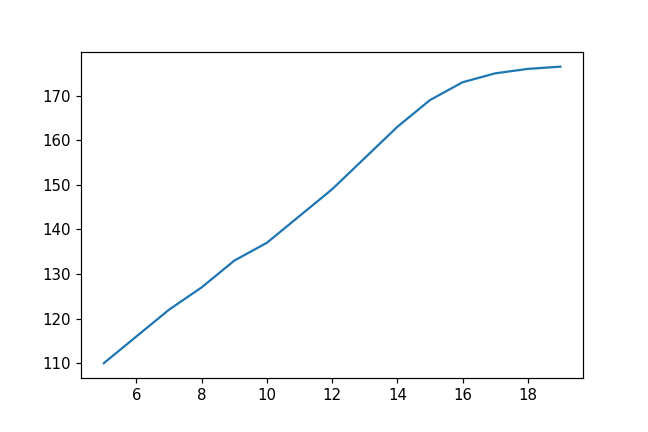

In [6]:
# Plot Age vs. Heights
plt.plot(heights_boys['Age'], heights_boys['Height'])

Text(0, 0.5, 'Height (cm)')

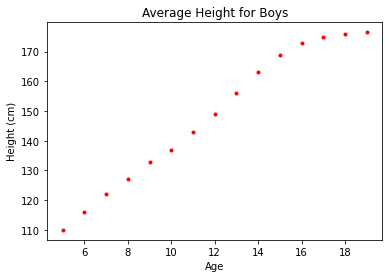

In [3]:
# Add descriptions to the figure
plt.plot(heights_boys['Age'], heights_boys['Height'], 'r.')
plt.title("Average Height for Boys")
plt.xlabel("Age")
plt.ylabel("Height (cm)")

In [12]:
# Multiple sequences of data
heights = pd.DataFrame({'Age': range(5, 20),
                        'BoyHeight': [110, 116, 122, 127, 133, 137, 143, 149, 156, 163, 169, 173, 175, 176, 176.5],
                        'GirlHeight': [109.6, 115, 121, 126.5, 132.5, 139, 145, 151, 156, 160, 161.7, 162.5, 162.8, 163, 163.2]})
heights

,Age,BoyHeight,GirlHeight
0,5,110.0,109.6
1,6,116.0,115.0
2,7,122.0,121.0
3,8,127.0,126.5
4,9,133.0,132.5
5,10,137.0,139.0
6,11,143.0,145.0
7,12,149.0,151.0
8,13,156.0,156.0
9,14,163.0,160.0


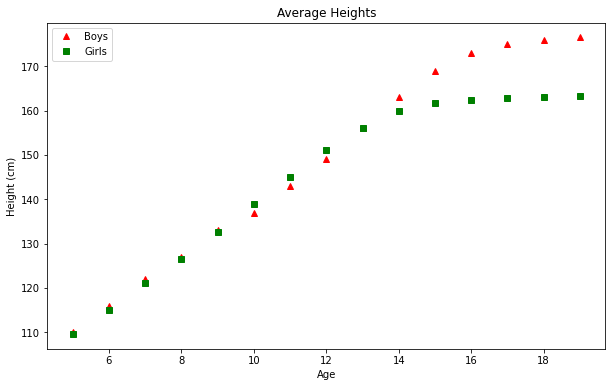

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(heights['Age'], heights['BoyHeight'], 'r^', label="Boys")
plt.plot(heights['Age'], heights['GirlHeight'], 'gs', label='Girls')
plt.title("Average Heights")
plt.xlabel("Age")
plt.ylabel("Height (cm)")
plt.legend()

**Q: What can we see from this plot?**

## Bar Plots

Bar plots are useful for presenting labeled data.

In [20]:
df = pd.DataFrame([[67, 76],
                   [78, 87],
                   [89, 98],
                   [90, 95]],
                  index=['Alice', 'Bob', 'Clare', 'David'],
                  columns=['Midterm', 'Final'])
df

,Midterm,Final
Alice,67,76
Bob,78,87
Clare,89,98
David,90,95


<IPython.core.display.Javascript object>


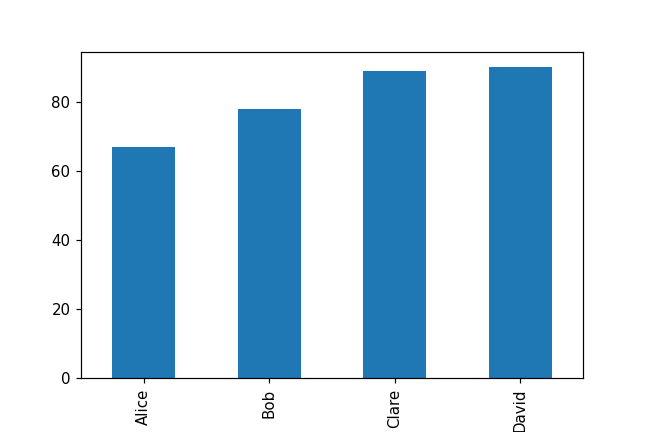

In [20]:
df['Midterm'].plot.bar()

<IPython.core.display.Javascript object>


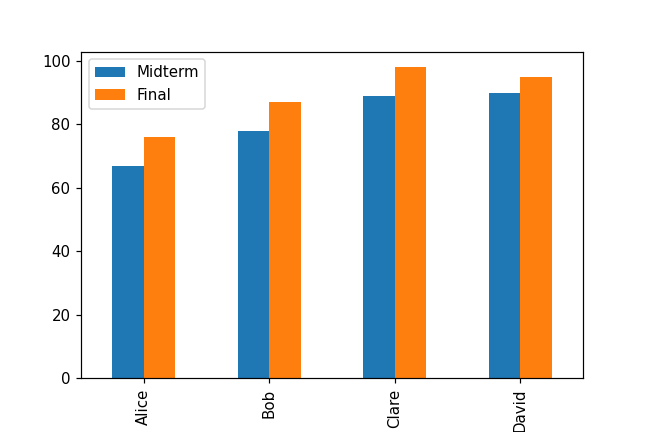

In [21]:
df[['Midterm', 'Final']].plot.bar()

<IPython.core.display.Javascript object>


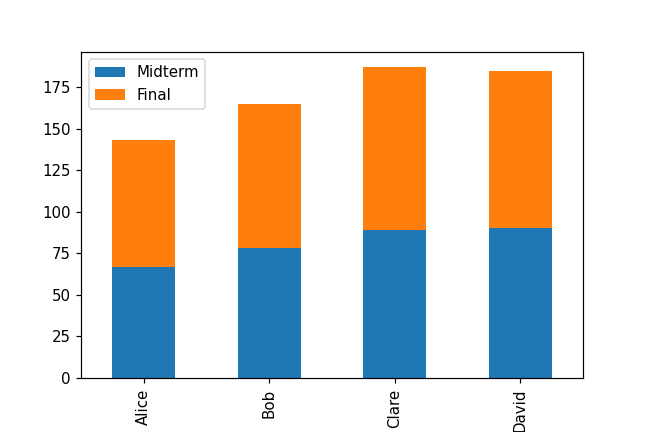

In [22]:
df[['Midterm', 'Final']].plot.bar(stacked=True)

<IPython.core.display.Javascript object>


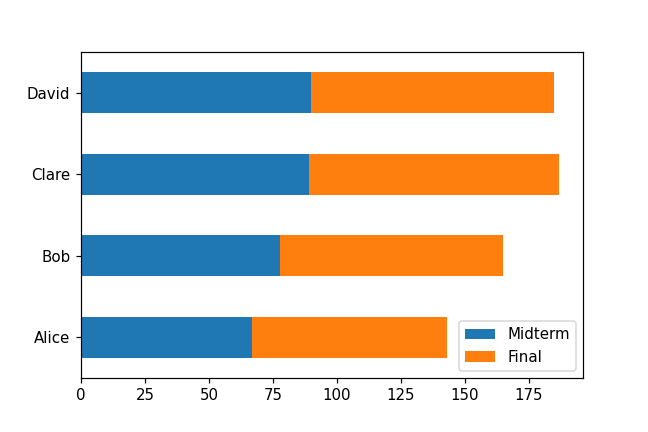

In [23]:
df[['Midterm', 'Final']].plot.barh(stacked=True)

## Histograms
**Histograms** are useful for showing the distribution of a variable
- Each bar cover a range of values.
- The height of each bar represents the number of data in the corresponding range.
- Boundary values are counted towards the left bar by convention.

In [32]:
# Generate 100 values using np.random.rand()
df = pd.DataFrame(np.random.rand(100), columns=['Rand'])
df

,Rand
0,0.977892
1,0.751022
2,0.168671
3,0.596192
4,0.921858
...,...
95,0.025697
96,0.845654
97,0.612120
98,0.031473


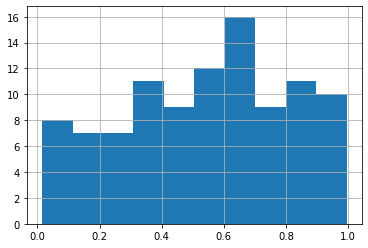

In [33]:
df['Rand'].hist()

In [34]:
# Add a column 'Randn' with values generated by np.random.randn()
df['Randn'] = np.random.randn(100)
df

,Rand,Randn
0,0.977892,-1.088459
1,0.751022,-1.454993
2,0.168671,-1.188494
3,0.596192,-0.496340
4,0.921858,0.995962
...,...,...
95,0.025697,-0.901229
96,0.845654,0.103710
97,0.612120,0.118573
98,0.031473,1.885632


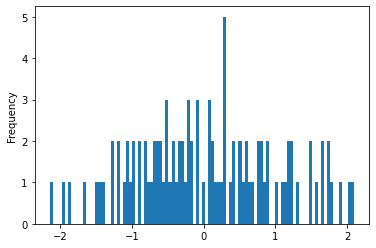

In [40]:
# df['Randn'].hist()
df['Randn'].plot.hist(bins=100)

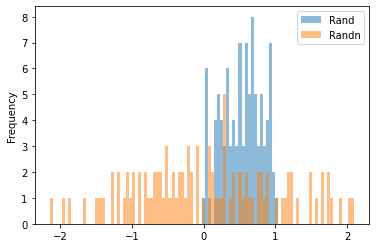

In [41]:
df[['Rand', 'Randn']].plot.hist(alpha=0.5, bins=100)

## Pie Plots

**Pie Plots** are useful for showing the proportion of values.

In [5]:
df = pd.DataFrame([5, 10, 20, 7, 3],
                  index=['A', 'B', 'C', 'D', 'F'],
                  columns=['Students'])
df

,Students
A,5
B,10
C,20
D,7
F,3


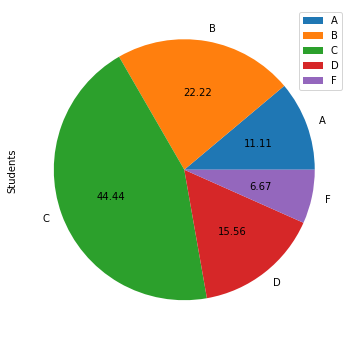

In [6]:
df['Students'].plot.pie(autopct='%.2f', figsize=(6, 6))
plt.legend()

## Box Plots

**Box plots** are used for depicting groups of numerical data through their quartiles

- Upper edge: 75% quartile (75% of data are below this value)
- Lower edge: 25% quartile (25% of data are below this value)
- Middle line: median value (50% of data are below this value)
- Upper bar: upper *interquartile range* (values above this bar are considered outliers)
- Lower bar: lower *interquartile range* (values below this bar are considered outliers)
- Dots: outliers

In [4]:
# Import the iris dataset
from sklearn import datasets
iris_raw = datasets.load_iris()
iris_raw

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

<img src="https://gadictos.com/wp-content/uploads/2019/03/iris-machinelearning-1060x397.png">

In [5]:
# Turn the data into a data frame
iris_df = pd.DataFrame(data=iris_raw['data'],
                       columns=iris_raw['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


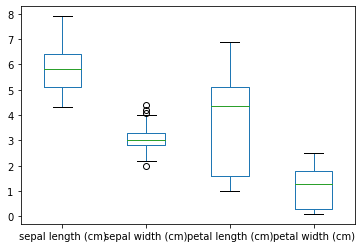

In [6]:
iris_df.plot.box()

In [15]:
# Add target labels
iris_df['Target'] = iris_raw['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris_raw['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**1. What is the distribution of sepal length for each type of iris?**

(4.0, 8.0)

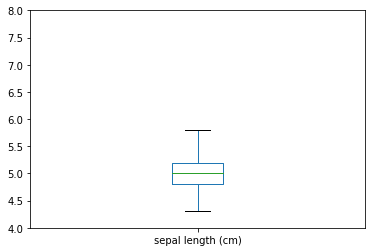

In [17]:

# Draw box plots or histograms to show the distribution

# Split the entire data set into three subsets
iris_setosa = iris_df[iris_df['Target'] == 0]
iris_versicolor = iris_df[iris_df['Target'] == 1]
iris_virginica = iris_df[iris_df['Target'] == 2]

# Draw box plots for each subset
iris_setosa['sepal length (cm)'].plot.box()
plt.ylim([4, 8])

(4.0, 8.0)

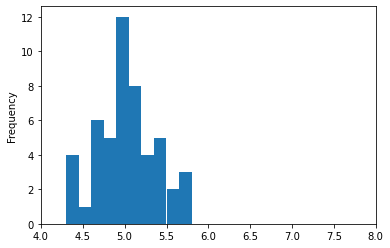

In [47]:
iris_setosa['sepal length (cm)'].plot.hist()
plt.xlim([4, 8])

(4.0, 8.0)

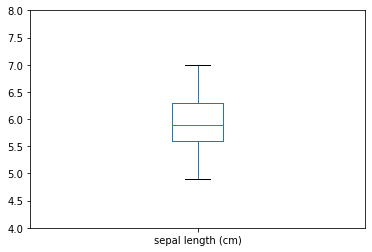

In [42]:
iris_versicolor['sepal length (cm)'].plot.box()
plt.ylim([4, 8])

(4.0, 8.0)

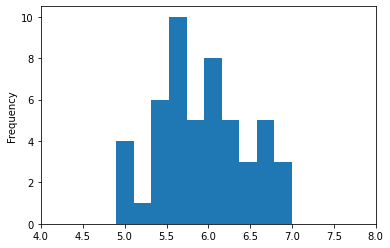

In [48]:
iris_versicolor['sepal length (cm)'].plot.hist()
plt.xlim([4, 8])

(4.0, 8.0)

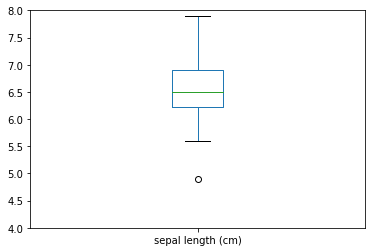

In [43]:
iris_virginica['sepal length (cm)'].plot.box()
plt.ylim([4, 8])

(4.0, 8.0)

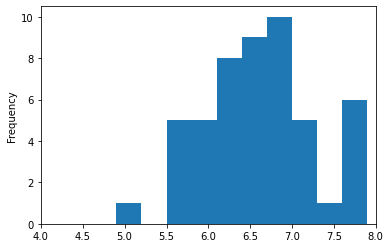

In [49]:
iris_virginica['sepal length (cm)'].plot.hist()
plt.xlim([4, 8])

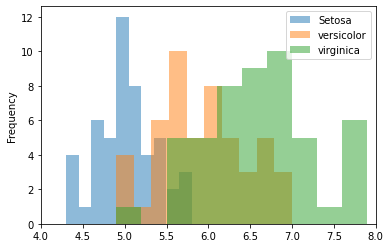

In [53]:
iris_setosa['sepal length (cm)'].plot.hist(alpha=0.5, label='Setosa')
iris_versicolor['sepal length (cm)'].plot.hist(alpha=0.5, label='versicolor')
iris_virginica['sepal length (cm)'].plot.hist(alpha=0.5,label='virginica')
plt.xlim([4, 8])
plt.legend()

setosa has short sepal, vericolor has sepal is in the midlle of the range and virginica has long sepal


**2. What is the distribution of petal length and width for each type of iris?**

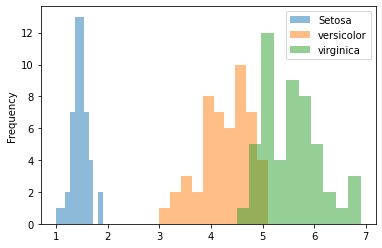

In [56]:
iris_setosa['petal length (cm)'].plot.hist(alpha=0.5, label='Setosa')
iris_versicolor['petal length (cm)'].plot.hist(alpha=0.5, label='versicolor')
iris_virginica['petal length (cm)'].plot.hist(alpha=0.5,label='virginica')
#plt.xlim([4, 8])
plt.legend()

** observation**
1 setosa has much shoter length: if the petal length is less than 2.5cm is very likely to be setosa
2 although there is overlap between versicolor and virginica, versicolor has shorter petal length than viginica 
-if the petal length is less than 4.5cm and greater than 2.5cm is very like to be versicolor.
-if the petal length is greater than 5cm is very likely to be virginica

**3. What is the distribution of sepal length and width for each type of iris?**

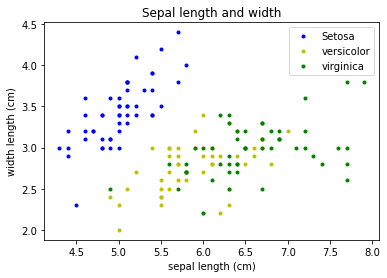

In [59]:
# create a scatter plot 
plt.plot(iris_setosa['sepal length (cm)'], iris_setosa['sepal width (cm)'], 'b.', label= 'Setosa')
plt.plot(iris_versicolor['sepal length (cm)'], iris_versicolor['sepal width (cm)'], 'y.', label= 'versicolor')
plt.plot(iris_virginica['sepal length (cm)'], iris_virginica['sepal width (cm)'], 'g.', label= 'virginica')       
plt.title("Sepal length and width")
plt.xlabel("sepal length (cm)")
plt.ylabel("width length (cm)")
plt.legend()

**4. What is the distribution of petal length and width for each type of iris?**

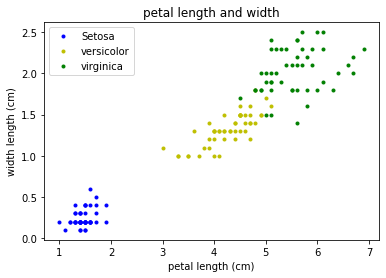

In [60]:
plt.plot(iris_setosa['petal length (cm)'], iris_setosa['petal width (cm)'], 'b.', label= 'Setosa')
plt.plot(iris_versicolor['petal length (cm)'], iris_versicolor['petal width (cm)'], 'y.', label= 'versicolor')
plt.plot(iris_virginica['petal length (cm)'], iris_virginica['petal width (cm)'], 'g.', label= 'virginica')       
plt.title("petal length and width")
plt.xlabel("petal length (cm)")
plt.ylabel("width length (cm)")
plt.legend()

Obeservation: if petal lenght + petal width > 6.6 is likely to be viginica
              if petal length + petal width < 6.6 is likely to be versicolor or setosa

**5. Based on the above observations, can you come up with a simple rule for classification?**

# rule
1-if petal length is < 2.5 it is setosa 
2-if not look petal length + petal width:
    if sum > 6.6 it is virginica.
    if sum < 6.6 it is versicolor.

**6. Can you show the accuracy of your classification rules on each type of iris?**

In [64]:
# define the function get_class to implement the rule
def get_class(x):
    petal_length = x['petal length (cm)']
    petal_width = x['petal width (cm)']
    
    if petal_length < 2.5:
        return "setosa"
    elif petal_length + petal_width > 6.6:
        return "virginica"
    else:
        return "versicolor"

In [66]:
iris_df['Classification'] = iris_df.apply(get_class, axis = 1)
iris_df.sample(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Classification
50,7.0,3.2,4.7,1.4,1,versicolor
149,5.9,3.0,5.1,1.8,2,virginica
124,6.7,3.3,5.7,2.1,2,virginica
22,4.6,3.6,1.0,0.2,0,setosa
88,5.6,3.0,4.1,1.3,1,versicolor
120,6.9,3.2,5.7,2.3,2,virginica
19,5.1,3.8,1.5,0.3,0,setosa
139,6.9,3.1,5.4,2.1,2,virginica
80,5.5,2.4,3.8,1.1,1,versicolor
90,5.5,2.6,4.4,1.2,1,versicolor
